Import Libraries and Packages

In [1]:
import os
import shutil
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Data Extraction

In [2]:
# Download the dataset
dataset_url = 'https://www.kaggle.com/datasets/msambare/fer2013'
od.download(dataset_url)

# Define dataset paths
train_path = "fer2013/train"
val_path = "fer2013/test"

Skipping, found downloaded files in ".\fer2013" (use force=True to force download)


Data Pre-Processing

In [3]:
# Initialize data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
batch_size = 64
target_size = (48, 48)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=target_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=True
)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=target_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
# Define the number of classes
num_classes = 7

# New Model architecture with additional convolutional layers
model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(512, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

# Model compilation
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

CNN Algorithm

In [5]:
# Define the number of classes
num_classes = 7

def create_model():
    # New Model architecture with additional convolutional layers
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(512, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    # Model compilation
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    return model

K-Fold Cross Validation & Confusion Matrix

Fold 1/10
Found 12918 validated image filenames belonging to 7 classes.
Found 1436 validated image filenames belonging to 7 classes.
Epoch 1/10
202/202 [==============================] - 424s 2s/step - loss: 1.8355 - accuracy: 0.2423 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 1.8154 - val_accuracy: 0.2514 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/10
202/202 [==============================] - 394s 2s/step - loss: 1.8236 - accuracy: 0.2503 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 1.8132 - val_accuracy: 0.2514 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/10
202/202 [==============================] - 389s 2s/step - loss: 1.8183 - accuracy: 0.2517 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 1.8097 - val_accuracy: 0.2514 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/10
202/202 [==============================] - 416s 2s/step - loss: 1.8116 - accuracy: 0.2514 - precision_1: 0.00

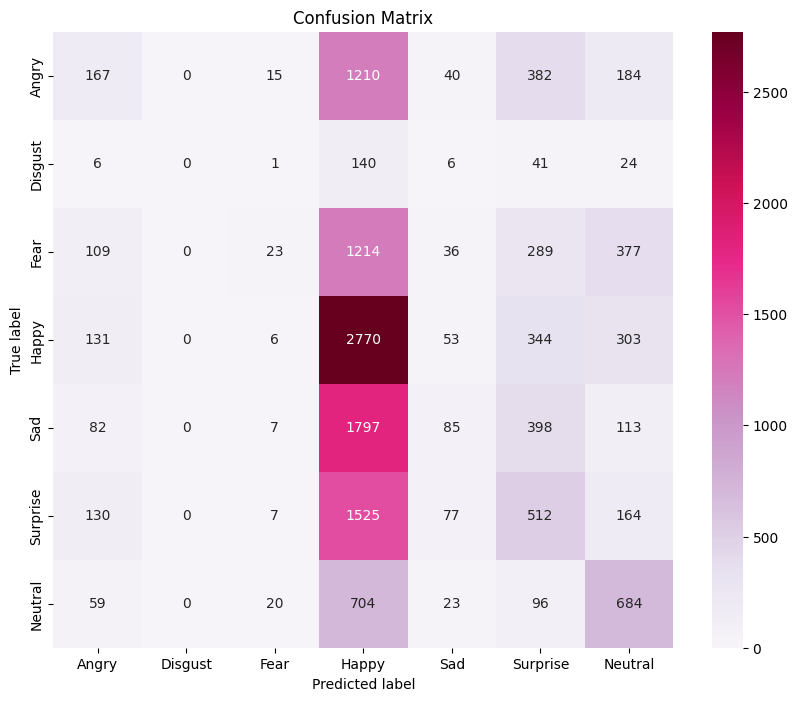

Confusion Matrix:
[[ 167    0   15 1210   40  382  184]
 [   6    0    1  140    6   41   24]
 [ 109    0   23 1214   36  289  377]
 [ 131    0    6 2770   53  344  303]
 [  82    0    7 1797   85  398  113]
 [ 130    0    7 1525   77  512  164]
 [  59    0   20  704   23   96  684]]


In [6]:
# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
num_classes = len(emotion_labels)

# Initialize dictionaries to store metrics for each emotion
accuracy_dict = {emotion: [] for emotion in emotion_labels}
precision_dict = {emotion: [] for emotion in emotion_labels}
recall_dict = {emotion: [] for emotion in emotion_labels}
f1_score_dict = {emotion: [] for emotion in emotion_labels}

# Get the list of filenames and corresponding classes
filenames = train_generator.filenames
classes = train_generator.classes

# Initialize lists to store true and predicted labels
true_labels_all = []
pred_labels_all = []

# Split the data into training (50%) and test (50%) sets
train_files, test_files, train_classes, test_classes = train_test_split(
    filenames, classes, test_size=0.5, stratify=classes, random_state=42
)

# Use Stratified K-Fold Cross Validation on the training data
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Loop through each fold
for fold, (train_indices, val_indices) in enumerate(skf.split(train_files, train_classes)):
    print(f"Fold {fold+1}/{skf.n_splits}")

    # Split data into training and validation sets for the current fold
    fold_train_files = [train_files[i] for i in train_indices]
    fold_train_classes = [train_classes[i] for i in train_indices]
    fold_val_files = [train_files[i] for i in val_indices]
    fold_val_classes = [train_classes[i] for i in val_indices]

    # Create dataframes for the current fold
    train_df = pd.DataFrame({'filename': fold_train_files, 'class': fold_train_classes}).astype(str)
    val_df = pd.DataFrame({'filename': fold_val_files, 'class': fold_val_classes}).astype(str)

    # Create model for each fold
    model = create_model()

    # Create data generators for the current fold
    train_generator_fold = train_datagen.flow_from_dataframe(
        train_df,
        directory=train_path,
        x_col='filename',
        y_col='class',
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True
    )
    
    val_generator_fold = val_datagen.flow_from_dataframe(
        val_df,
        directory=train_path,
        x_col='filename',
        y_col='class',
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False
    )

    # Train the model
    history = model.fit(
        train_generator_fold,
        epochs=10,
        validation_data=val_generator_fold,
        verbose=1
    )

    # Evaluate the model on validation set for each fold
    val_metrics = model.evaluate(
        val_generator_fold,
        verbose=0
    )
    val_loss, val_acc, val_precision, val_recall = val_metrics[0], val_metrics[1], val_metrics[2], val_metrics[3]
    
    # Calculate F1-score
    if val_precision + val_recall == 0:
        val_f1_score = 0
    else:
        val_f1_score = 2 * (val_precision * val_recall) / (val_precision + val_recall)

    # Generate confusion matrix for this fold
    y_pred = model.predict(val_generator_fold)
    y_true = val_generator_fold.classes
    conf_matrix = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

    # Append true and predicted labels
    true_labels_all.extend(y_true)
    pred_labels_all.extend(np.argmax(y_pred, axis=1))

    # Calculate metrics for each emotion
    for i, emotion in enumerate(emotion_labels):
        tp = conf_matrix[i, i]
        fp = np.sum(conf_matrix[:, i]) - tp
        fn = np.sum(conf_matrix[i, :]) - tp
        tn = np.sum(conf_matrix) - (tp + fp + fn)

        accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        accuracy_dict[emotion].append(accuracy)
        precision_dict[emotion].append(precision)
        recall_dict[emotion].append(recall)
        f1_score_dict[emotion].append(f1_score)

    # Print metrics for each emotion
    for emotion in emotion_labels:
        print(f"Metrics for {emotion}:")
        print(f"Average Validation Accuracy: {np.mean(accuracy_dict[emotion]) * 100:.2f}%")
        print(f"Average Validation Precision: {np.mean(precision_dict[emotion]) * 100:.2f}%")
        print(f"Average Validation Recall: {np.mean(recall_dict[emotion]) * 100:.2f}%")
        print(f"Average Validation F1-score: {np.mean(f1_score_dict[emotion]) * 100:.2f}%")
        print()

# Print overall average metrics
print("Overall Average Metrics:")
print(f"Average Validation Accuracy: {np.mean([np.mean(accuracy_dict[emotion]) for emotion in emotion_labels]) * 100:.2f}%")
print(f"Average Validation Precision: {np.mean([np.mean(precision_dict[emotion]) for emotion in emotion_labels]) * 100:.2f}%")
print(f"Average Validation Recall: {np.mean([np.mean(recall_dict[emotion]) for emotion in emotion_labels]) * 100:.2f}%")
print(f"Average Validation F1-score: {np.mean([np.mean(f1_score_dict[emotion]) for emotion in emotion_labels]) * 100:.2f}%")

# Generate the confusion matrix using accumulated true and predicted labels
cm = confusion_matrix(true_labels_all, pred_labels_all, labels=np.arange(num_classes))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)